> 式(1.58)

$$R_{ref}=(\frac{P_tG^2\lambda^2\sigma_{ref}\tau_{ref}}{(4\pi)^3kT_eFL(SNR)_{ref}})^{\frac{1}{4}}$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti TC']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


def cal_R_ref(P_t, G, lamb, sigma, tau, F, L, SNR_ref):
    k = 1.38e-23
    T_e = 290
    R_ref_4 = P_t * (G * lamb) ** 2 * sigma * tau / ((4 * np.pi) ** 3 * k * T_e * F * L * SNR_ref)
    return R_ref_4 ** (1 / 4)


def from_rad(v):
    return v * 180 / np.pi


def from_dB(v):
    return 10 ** (v / 10)

def to_dB(v):
    return 10 * np.log10(v)

c = 3e8
f = 94e9
lamb = c / f
print('λ:', '%.5f m' % lamb)

tau = 50e-9
delta_R = c * tau / 2
print('ΔR:', '%.1f m' % delta_R)

B = 1 / tau
print('B:', '%.1e Hz' % B)

D = 12 * 2.54e-2
theta_3dB = 1.25 * lamb / D
theta_3dB = from_rad(theta_3dB)
print('θ_3dB:', '%.4f°' % theta_3dB)

theta_all = 120 + 120
T_sc = 3
v = theta_all / T_sc
print('v:', '%d°/s' % v)

T_i = theta_3dB / v
print('T_i:', '%.3e s' % T_i)

PRF = 10e3
n_P = np.around(T_i * PRF)

λ: 0.00319 m
ΔR: 7.5 m
B: 2.0e+07 Hz
θ_3dB: 0.7499°
v: 80°/s
T_i: 9.374e-03 s


In [7]:
P_t = 4
G = from_dB(47)
sigma = 20
F, L = from_dB(7), from_dB(10)
SNR_ref = from_dB(10)
R_ref = cal_R_ref(P_t, G, lamb, sigma, tau, F, L, SNR_ref)
print('Origin R_ref:', '%d m' % R_ref)

Origin R_ref: 2251 m


> 式(1.82)

$$(SNR)_{CI}=n_P(SNR)_1$$

In [9]:
SNR_1 = SNR_ref / n_P
R_n_P = cal_R_ref(P_t, G, lamb, sigma, tau, F, L, SNR_1)
print('R_n_P:', '%d m' % R_n_P)
print('(SNR)_1:', '%.2f dB' % to_dB(SNR_1))

R_n_P: 7011 m
(SNR)_1: -9.73 dB


> 变式

$$(SNR)_{ref}=\frac{P_tG^2\lambda^2\sigma_{ref}\tau_{ref}}{(4\pi)^3kT_eFLR_{ref}^4}$$

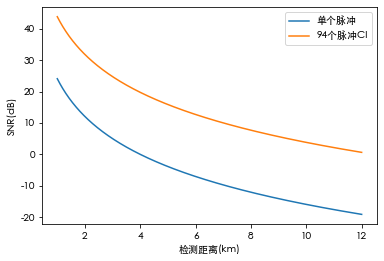

In [19]:
def cal_SNR(P_t, G, lamb, sigma, tau, F, L, R_ref):
    k = 1.38e-23
    T_e = 290
    SNR_ref = P_t * (G * lamb) ** 2 * sigma * tau / ((4 * np.pi) ** 3 * k * T_e * F * L * R_ref**4)
    return SNR_ref


def plot(x,y,yls):
    for i,j in zip(y,yls):
        plt.plot(x,i,label=j)
    plt.xlabel('检测距离(km)')
    plt.ylabel('SNR(dB)')
    plt.legend()
    plt.show()

R = np.linspace(1,12,1000) * 1000
SNR_1 = cal_SNR(P_t,G,lamb,sigma,tau,F,L,R)
SNR_ref = n_P * SNR_1
plot(R/1000,[to_dB(SNR_1),to_dB(SNR_ref)],['单个脉冲','94个脉冲CI'])

> 式(1.87)

$$(SNR)_1=\frac{(SNR)_{NCI}}{2n_P}+\sqrt{\frac{(SNR)_{NCI}^2}{4n_P^2}+\frac{(SNR)_{NCI}}{n_P}}$$

In [12]:
SNR_ref = from_dB(10)
fac = SNR_ref / n_P
SNR_1 = fac / 2 + np.sqrt((fac / 2)**2 + fac)
print('(SNR)_1:', '%.2f dB' % to_dB(SNR_1))

(SNR)_1: -4.16 dB


> 式(1.85)

$$L_{NCI}=\frac{1+(SNR)_1}{(SNR)_1}$$

> 式(1.86)，其实就是式(1.87)的变式

$$(SNR)_{NCI}=\frac{n_P(SNR)_1}{L_{NCI}}=n_P(SNR)_1\times\frac{(SNR)_1}{1+(SNR)_1}$$

In [14]:
L_NCI = 1 / SNR_1 + 1
print('L_NCI:', '%.3f dB' % to_dB(L_NCI))
R_n_P = cal_R_ref(P_t, G, lamb, sigma, tau, F, L, SNR_1)
print('R_n_P:', '%d m' % R_n_P)

L_NCI: 5.571 dB
R_n_P: 5088 m


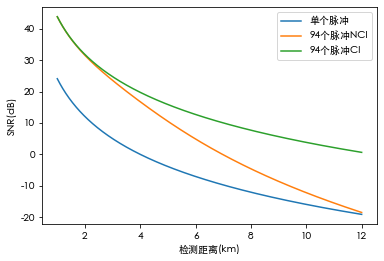

In [22]:
R = np.linspace(1,12,1000) * 1000
SNR_1 = cal_SNR(P_t,G,lamb,sigma,tau,F,L,R)
SNR_CI = n_P * SNR_1
SNR_NCI = SNR_CI * SNR_1 / (1 + SNR_1)
plot(R/1000,[to_dB(SNR_1),to_dB(SNR_NCI),to_dB(SNR_CI)],['单个脉冲','94个脉冲NCI','94个脉冲CI'])